### Análise Exploratória dos Dados da Associação Passos Mágicos


Passos Mágicos é uma associação que atua trabalhando na transformação da vida de crianças e jovens de baixa renda os levando a melhores oportunidades de vida, que inclui: educação de qualidade, auxílio psicológico/psicopedagógico, ampliação de sua visão de mundo e protagonismo. 

Para o projeto do Curso de Pós Graduação de Engenharia de Machine Learning da FIAP, Tech Challenger 5, fomos desafiados a desenvolver um modelo capaz de estimar o risco de defasagem escolar de cada estudante nos anos 2022, 2023 e 2024.

Os dados estão disponíveis nesse [link](https://docs.google.com/spreadsheets/d/1td91KoeSgXrUrCVOUkLmONG9Go3LVcXpcNEw_XrL2R0/edit?gid=555005642#gid=555005642).

O dicionário de dados está disponível [aqui](https://drive.google.com/file/d/1Z8Rs6SLicxMJUu_zwrYD399mPvs-djVb/view).

Outros materiais disponíveis [aqui](https://drive.google.com/drive/folders/1Z1j6uzzCOgjB2a6i3Ym1pmJRsasfm7cD).

Para conhecer mais o projeto: [https://passosmagicos.org.br/](https://passosmagicos.org.br/)

### Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import unidecode
from IPython.display import display, HTML

### Carregamento dos dados

In [4]:
# Dados de 2022
df_2022 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2022')

In [3]:
df_2022.columns

Index(['RA', 'Fase', 'Turma', 'Nome', 'Ano nasc', 'Idade 22', 'Gênero',
       'Ano ingresso', 'Instituição de ensino', 'Pedra 20', 'Pedra 21',
       'Pedra 22', 'INDE 22', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'Rec Psicologia', 'IDA',
       'Matem', 'Portug', 'Inglês', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase ideal', 'Defas', 'Destaque IEG', 'Destaque IDA', 'Destaque IPV'],
      dtype='object')

In [5]:
# Dados de 2023
df_2023 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2023')

In [ ]:
df_2023.columns

Index(['RA', 'Fase', 'INDE 2023', 'Pedra 2023', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'IPP', 'Rec Psicologia',
       'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Destaque IPV.1'],
      dtype='object')

In [6]:
# Dados de 2024
df_2024 = pd.read_excel('../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx',sheet_name='PEDE2024')

In [7]:
df_2024.columns

Index(['RA', 'Fase', 'INDE 2024', 'Pedra 2024', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Avaliador4',
       'Avaliador5', 'Avaliador6', 'IAA', 'IEG', 'IPS', 'IPP',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Escola', 'Ativo/ Inativo', 'Ativo/ Inativo.1'],
      dtype='object')

### Análises

- Quantos alunos tem em cada arquivo (2022, 2023, 2024)? R: 860, 1014, 1156
- Há registros duplicados no mesmo arquivo? R: Não
- É possível identificar histórico de um aluno? R: Sim
- Quais as características dos alunos que não estão no ano seguinte?
- Todos os arquivos possuem as mesmas colunas? R: Não

- Quantos alunos sairam de 2022 para 2023? Análise por gênero, fase, defasagem.
- Quantos alunos novos em 2023? Análise por gênero, fase, defasagem.
- Houve mudança de defasagem em algum aluno? Para melhor ou para pior?

#### Quantos alunos tem em cada arquivo?

In [8]:
print(f"2022: {df_2022.shape[0]}")
print(f"2023: {df_2023.shape[0]}")
print(f"2024: {df_2024.shape[0]}")

2022: 860
2023: 1014
2024: 1156


#### Há registros duplicados no mesmo ano considerando o Nome Anonimizado?

In [9]:
duplicados = df_2022[df_2022.duplicated(subset=['Nome'], keep=False)]

print(duplicados.to_string())

Empty DataFrame
Columns: [RA, Fase, Turma, Nome, Ano nasc, Idade 22, Gênero, Ano ingresso, Instituição de ensino, Pedra 20, Pedra 21, Pedra 22, INDE 22, Cg, Cf, Ct, Nº Av, Avaliador1, Rec Av1, Avaliador2, Rec Av2, Avaliador3, Rec Av3, Avaliador4, Rec Av4, IAA, IEG, IPS, Rec Psicologia, IDA, Matem, Portug, Inglês, Indicado, Atingiu PV, IPV, IAN, Fase ideal, Defas, Destaque IEG, Destaque IDA, Destaque IPV]
Index: []


In [10]:
duplicados = df_2023[df_2023.duplicated(subset=['Nome Anonimizado'], keep=False)]

print(duplicados.to_string())

Empty DataFrame
Columns: [RA, Fase, INDE 2023, Pedra 2023, Turma, Nome Anonimizado, Data de Nasc, Idade, Gênero, Ano ingresso, Instituição de ensino, Pedra 20, Pedra 21, Pedra 22, Pedra 23, INDE 22, INDE 23, Cg, Cf, Ct, Nº Av, Avaliador1, Rec Av1, Avaliador2, Rec Av2, Avaliador3, Rec Av3, Avaliador4, Rec Av4, IAA, IEG, IPS, IPP, Rec Psicologia, IDA, Mat, Por, Ing, Indicado, Atingiu PV, IPV, IAN, Fase Ideal, Defasagem, Destaque IEG, Destaque IDA, Destaque IPV, Destaque IPV.1]
Index: []


In [11]:
duplicados = df_2024[df_2024.duplicated(subset=['Nome Anonimizado'], keep=False)]

print(duplicados.to_string())

Empty DataFrame
Columns: [RA, Fase, INDE 2024, Pedra 2024, Turma, Nome Anonimizado, Data de Nasc, Idade, Gênero, Ano ingresso, Instituição de ensino, Pedra 20, Pedra 21, Pedra 22, Pedra 23, INDE 22, INDE 23, Cg, Cf, Ct, Nº Av, Avaliador1, Rec Av1, Avaliador2, Rec Av2, Avaliador3, Avaliador4, Avaliador5, Avaliador6, IAA, IEG, IPS, IPP, Rec Psicologia, IDA, Mat, Por, Ing, Indicado, Atingiu PV, IPV, IAN, Fase Ideal, Defasagem, Destaque IEG, Destaque IDA, Destaque IPV, Escola, Ativo/ Inativo, Ativo/ Inativo.1]
Index: []


#### É possível identificar histórico de um aluno pelo "Nome Anonimizado"?

In [12]:
# Extrai os valores únicos de cada coluna de interesse
nomes_df1 = set(df_2022['Nome'])
nomes_df2 = set(df_2023['Nome Anonimizado'])
nomes_df3 = set(df_2024['Nome Anonimizado'])

# Interseções (elementos que existem em ambos os conjuntos comparados)
comuns_1_e_2 = nomes_df1.intersection(nomes_df2)
comuns_1_e_3 = nomes_df1.intersection(nomes_df3)
comuns_2_e_3 = nomes_df2.intersection(nomes_df3)

# Exibição dos resultados
print(f"--- Relatório de Interseções ---")
print(f"Comuns entre DF1 e DF2 (Qtd: {len(comuns_1_e_2)})")
print(f"Comuns entre DF1 e DF3 (Qtd: {len(comuns_1_e_3)})")
print(f"Comuns entre DF2 e DF3 (Qtd: {len(comuns_2_e_3)})")

## Se quiser imprimir a lista de nomes nas interseções
# print(f"Comuns entre DF1 e DF2 (Qtd: {len(comuns_1_e_2)}): {comuns_1_e_2}")
# print(f"Comuns entre DF1 e DF3 (Qtd: {len(comuns_1_e_3)}): {comuns_1_e_3}")
# print(f"Comuns entre DF2 e DF3 (Qtd: {len(comuns_2_e_3)}): {comuns_2_e_3}")


--- Relatório de Interseções ---
Comuns entre DF1 e DF2 (Qtd: 600)
Comuns entre DF1 e DF3 (Qtd: 472)
Comuns entre DF2 e DF3 (Qtd: 765)


#### Todos os arquivos possuem as mesmas colunas?

In [13]:

lista_dfs = [df_2022, df_2023, df_2024]
names_dfs = ['2022', '2023', '2024']

# Identificar todas as colunas únicas presentes no universo dos 3 dataframes
all_cols = sorted(list(set().union(*(df.columns for df in lista_dfs))))

dados_relatorio = []

# Verificar a presença de cada coluna
for col in all_cols:
    # Cria uma lista com os nomes dos DFs onde a coluna existe
    is_in = [names_dfs[i] for i, df in enumerate(lista_dfs) if col in df.columns]
    
    qtd = len(is_in)
    
    # Filtrar: Queremos colunas presentes em 1 ou 2 DFs (ou seja, excluir se for 3)
    if 1 <= qtd < 3:
        dados_relatorio.append({
            'Coluna': col,
            'Onde está presente': ', '.join(is_in),
            'Qtd Dataframes': qtd
        })

# Criar o DataFrame final para visualização
df_resultado = pd.DataFrame(dados_relatorio)

# Exibição
print("Relatório de Colunas (Presentes em apenas 1 ou 2 DataFrames):")
display(HTML(df_resultado.to_html()))


Relatório de Colunas (Presentes em apenas 1 ou 2 DataFrames):


,Coluna,Onde está presente,Qtd Dataframes
0,Ano nasc,2022,1
1,Ativo/ Inativo,2024,1
2,Ativo/ Inativo.1,2024,1
3,Avaliador5,2024,1
4,Avaliador6,2024,1
5,Data de Nasc,"2023, 2024",2
6,Defas,2022,1
7,Defasagem,"2023, 2024",2
8,Destaque IPV.1,2023,1
9,Escola,2024,1


#### Análise dos dados de 2022

In [14]:
with pd.option_context('display.max_columns', None):
    display(df_2022.head(2))
    

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


#### Padronização do nome dos campos

- Renomear o campo RA para registro_unico
- Renomear o campo Fase para nome_fase
- Renomear o campo Turma para nome_turma
- Renomear o campo Nome para nome_anonimizado
- Renomear o campo Idade 22 para num_idade
- Renomear o campo Gênero para nome_genero
- Renomear o campo Ano ingresso para num_ano_ingresso
- Renomear o campo Instituição de ensino para instituicao_ensino
- Renomear Pedra 20, Pedra 21, Pedra 22 para class_pedra_20, class_pedra_21, class_pedra_22
- Renomear o campo INDE 22 para ind_desenv_educ_22
- Renomear o campo Cg para class_aluno_geral
- Renomear o campo Cf para class_aluno_fase
- Renomear o campo Ct para class_aluno_turma 
- Renomear o campo Nº Av para num_avaliacao
- Renomear o campo Avaliador1 para nome_avaliador_1
- Renomear o campo Rec Av1 para observ_avaliador_1
- Renomear o campo Avaliador2 para nome_avaliador_2
- Renomear o campo Rec Av2 para observ_avaliador_2
- Renomear o campo Avaliador3 para nome_avaliador_3
- Renomear o campo Rec Av3 para observ_avaliador_3
- Renomear o campo Avaliador4 para nome_avaliador_4
- Renomear o campo Rec Av4 para observ_avaliador_4
- Renomear o campo IAA para indic_auto_avaliacao
- Renomear o campo IEG para indic_engajamento
- Renomear o campo IPS para indic_psicossocial
- Renomear o campo Rec Psicologia para observ_psico
- Renomear o campo IDA para indic_aprendizagem
- Renomear o campo Matem para nota_media_matematica
- Renomear o campo Portug para nota_media_portugues
- Renomear o campo Inglês para nota_media_infles
- Renomear o campo Indicado para flag_indicado_bolsa
- Renomear o campo Atingiu PV para flag_ating_ponto_virada
- Renomear o campo IPV para nota_media_ponto_virada
- Renomear o campo IAN para nota_media_adequacao
- Renomear o campo Fase ideal para nome_fase_ideal
- Renomear o campo Defas para qtd_desafagem
- Renomear o campo Destaque IEG para observ_engajamento
- Renomear o campo Destaque IDA para observ_aprendizagem
- Renomear o campo Destaque IPV para observ_ponto_virada

In [15]:
def rename_cols(df: pd.DataFrame, rename_dict:dict) -> pd.DataFrame:

    return df.rename(columns=rename_dict)


In [16]:
rename_dict_2022 = {
        "RA": "registro_unico",
        "Fase": "nome_fase",
        "Turma": "nome_turma",
        "Ano nasc": "num_ano_nascimento",
        "Nome": "nome_anonimizado",
        "Idade 22": "num_idade",
        "Gênero": "nome_genero",
        "Ano ingresso": "num_ano_ingresso",
        "Instituição de ensino": "instituicao_ensino",
        "Pedra 20": "class_pedra_20",
        "Pedra 21": "class_pedra_21",
        "Pedra 22": "class_pedra_22",
        "INDE 22": "indic_desenv_educ_22",  # padronizado com prefixo indic_
        "Cg": "class_geral",
        "Cf": "class_fase",
        "Ct": "class_turma",
        "Nº Av": "num_avaliacao",
        "Avaliador1": "nome_avaliador_1",
        "Rec Av1": "observ_avaliador_1",
        "Avaliador2": "nome_avaliador_2",
        "Rec Av2": "observ_avaliador_2",
        "Avaliador3": "nome_avaliador_3",
        "Rec Av3": "observ_avaliador_3",
        "Avaliador4": "nome_avaliador_4",
        "Rec Av4": "observ_avaliador_4",
        "IAA": "indic_auto_avaliacao",
        "IEG": "indic_engajamento",
        "IPS": "indic_psicossocial",
        "Rec Psicologia": "observ_psico",
        "IDA": "indic_aprendizagem",
        "Matem": "nota_media_matematica",
        "Portug": "nota_media_portugues",
        "Inglês": "nota_media_ingles",  # corrigido
        "Indicado": "flag_indicado_bolsa",
        "Atingiu PV": "flag_atingiu_ponto_virada",  # flag em vez de indic_
        "IPV": "nota_media_ponto_virada",
        "IAN": "nota_media_adequacao",
        "Fase ideal": "fase_nome_ideal",
        "Defas": "qtd_defasagem",  # quantidade padronizada
        "Destaque IEG": "observ_engajamento",
        "Destaque IDA": "observ_aprendizagem",
        "Destaque IPV": "observ_ponto_virada"
    }

In [17]:
# Registros com defasagem de negativa e iguais a 0
df_2022_cleaned = rename_cols(df_2022, rename_dict_2022)
with pd.option_context('display.max_columns', None):
    display(df_2022_cleaned.head(5))

,registro_unico,nome_fase,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629,13,6,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,Ametista,Quartzo,5.951,731,15,7,4,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ametista,7.427,344,6,2,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [18]:
# Registros com defasagem maior que 0
with pd.option_context('display.max_columns', None):
    display(df_2022_cleaned[df_2022_cleaned["qtd_defasagem"] > 0].head(5))	

,registro_unico,nome_fase,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,class_pedra_20,class_pedra_21,class_pedra_22,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada
51,RA-52,5,B,Aluno-52,2009,13,Menino,2018,Rede Decisão,Topázio,Ametista,Ametista,7.861,183,12,5,3,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-24,Promovido de Fase + Bolsa,Avaliador-31,NaN,9.6,8.9,7.5,Não atendido,6.2,3.3,6.3,8.8,Não,Não,7.500,10.0,Fase 3 (7º e 8º ano),2,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
80,RA-81,5,K,Aluno-81,2008,14,Menina,2017,Rede Decisão,Ametista,Topázio,Ametista,7.675,247,14,2,4,Avaliador-6,Promovido de Fase + Bolsa,Avaliador-27,Mantido na Fase atual,Avaliador-24,Mantido na Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,9.2,9.2,5.0,Requer avaliação,6.0,5.5,5.2,7.3,Não,Não,7.458,10.0,Fase 4 (9º ano),1,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
89,RA-90,5,L,Aluno-90,2009,13,Menina,2019,Rede Decisão,Topázio,Topázio,Topázio,9.442,1,1,1,4,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-24,Mantido na Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,10.0,9.7,9.4,Sem limitações,8.5,7.7,8.0,9.8,Não,Sim,9.750,10.0,Fase 3 (7º e 8º ano),2,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...
99,RA-100,4,A,Aluno-100,2009,13,Menina,2019,Rede Decisão,Ametista,Topázio,Ametista,7.618,268,22,7,4,Avaliador-6,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-30,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,7.8,5.0,Não indicado,7.6,7.0,7.8,8.1,Não,Não,7.250,10.0,Fase 3 (7º e 8º ano),1,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Melhorar: Integrar-se mais aos Princípios Pass...
102,RA-103,4,A,Aluno-103,2009,13,Menina,2020,Rede Decisão,Ágata,Ametista,Topázio,8.107,114,11,4,4,Avaliador-6,Promovido de Fase + Bolsa,Avaliador-27,Mantido na Fase atual,Avaliador-30,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.7,7.5,Não atendido,7.3,7.3,7.3,7.3,Não,Não,7.708,10.0,Fase 3 (7º e 8º ano),1,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...


#### Estatísticas Descritivas

In [19]:
df_2022_cleaned.describe()

,nome_fase,num_ano_nascimento,num_idade,num_ano_ingresso,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,nota_media_ponto_virada,nota_media_adequacao,qtd_defasagem
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,858.000000,858.000000,283.000000,860.000000,860.000000,860.000000
mean,2.098837,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,5.806876,6.320979,5.881272,7.253642,6.424419,-0.943023
std,1.788789,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,2.414215,2.080364,2.957315,1.093383,2.389609,0.845593
min,0.000000,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000
25%,1.000000,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,4.300000,5.200000,3.500000,6.722000,5.000000,-1.000000
50%,2.000000,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,6.000000,6.700000,6.300000,7.333000,5.000000,-1.000000
75%,3.000000,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.800000,7.800000,8.500000,7.917000,10.000000,0.000000
max,7.000000,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


#### Explorando Variáveis Categóricas

##### Quantidade de alunos em cada fase

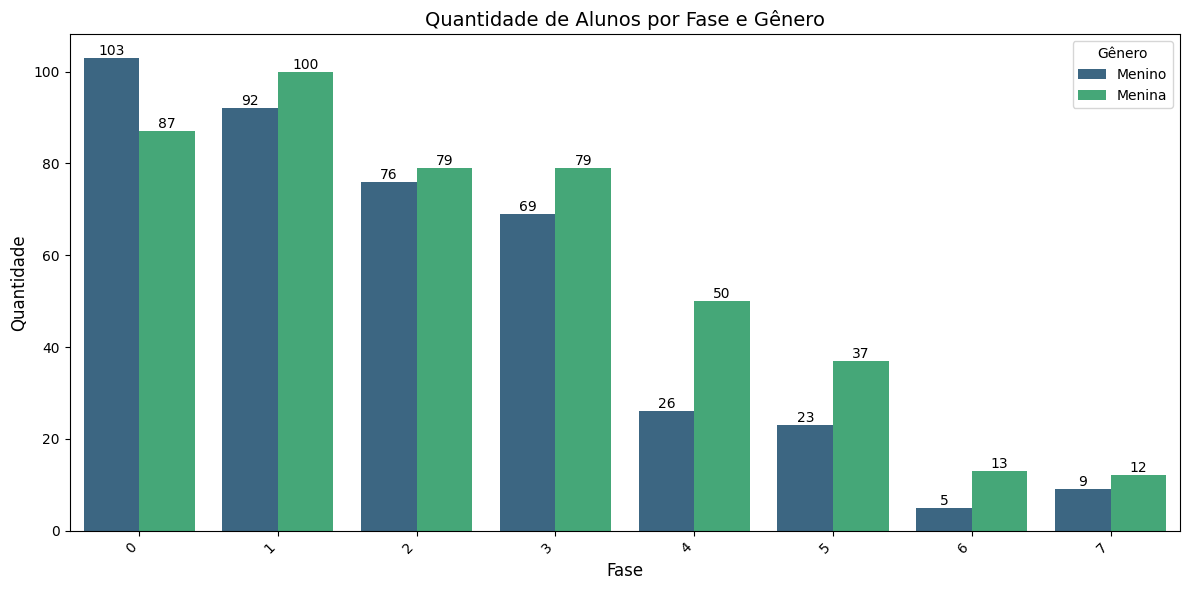

In [20]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df_2022_cleaned, 
    x='nome_fase', 
    hue='nome_genero', 
    palette='viridis'
)

plt.title('Quantidade de Alunos por Fase e Gênero', fontsize=14)
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Gênero')

plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


##### Instituição de ensino

In [21]:
df_2022_cleaned["instituicao_ensino"].unique()#	nome_turma nome_fase nome_genero instituicao_ensino

array(['Escola Pública', 'Rede Decisão', 'Escola JP II'], dtype=object)

##### Observação do Avaliador

In [22]:
df_2022_cleaned["observ_avaliador_1"].unique()#	nome_turma nome_fase nome_genero instituicao_ensino

array(['Mantido na Fase atual', 'Promovido de Fase',
       'Promovido de Fase + Bolsa', 'Alocado em Fase anterior',
       'Mantido na Fase + Bolsa', 'Não avaliado'], dtype=object)

In [23]:
df_2022_cleaned["observ_avaliador_2"].unique()#	nome_turma nome_fase nome_genero instituicao_ensino

array(['Promovido de Fase + Bolsa', 'Mantido na Fase atual',
       'Mantido na Fase + Bolsa', 'Promovido de Fase', 'Não avaliado'],
      dtype=object)

In [24]:
df_2022_cleaned["observ_avaliador_3"].unique()#	nome_turma nome_fase nome_genero instituicao_ensino

array(['Promovido de Fase', 'Promovido de Fase + Bolsa',
       'Mantido na Fase atual', 'Mantido na Fase + Bolsa',
       'Alocado em Fase anterior', 'Não avaliado'], dtype=object)

In [25]:
df_2022_cleaned["observ_avaliador_4"].unique() #	nome_turma nome_fase nome_genero instituicao_ensino

array(['Mantido na Fase atual', 'Promovido de Fase + Bolsa',
       'Mantido na Fase + Bolsa', 'Promovido de Fase',
       'Alocado em Fase anterior', nan], dtype=object)

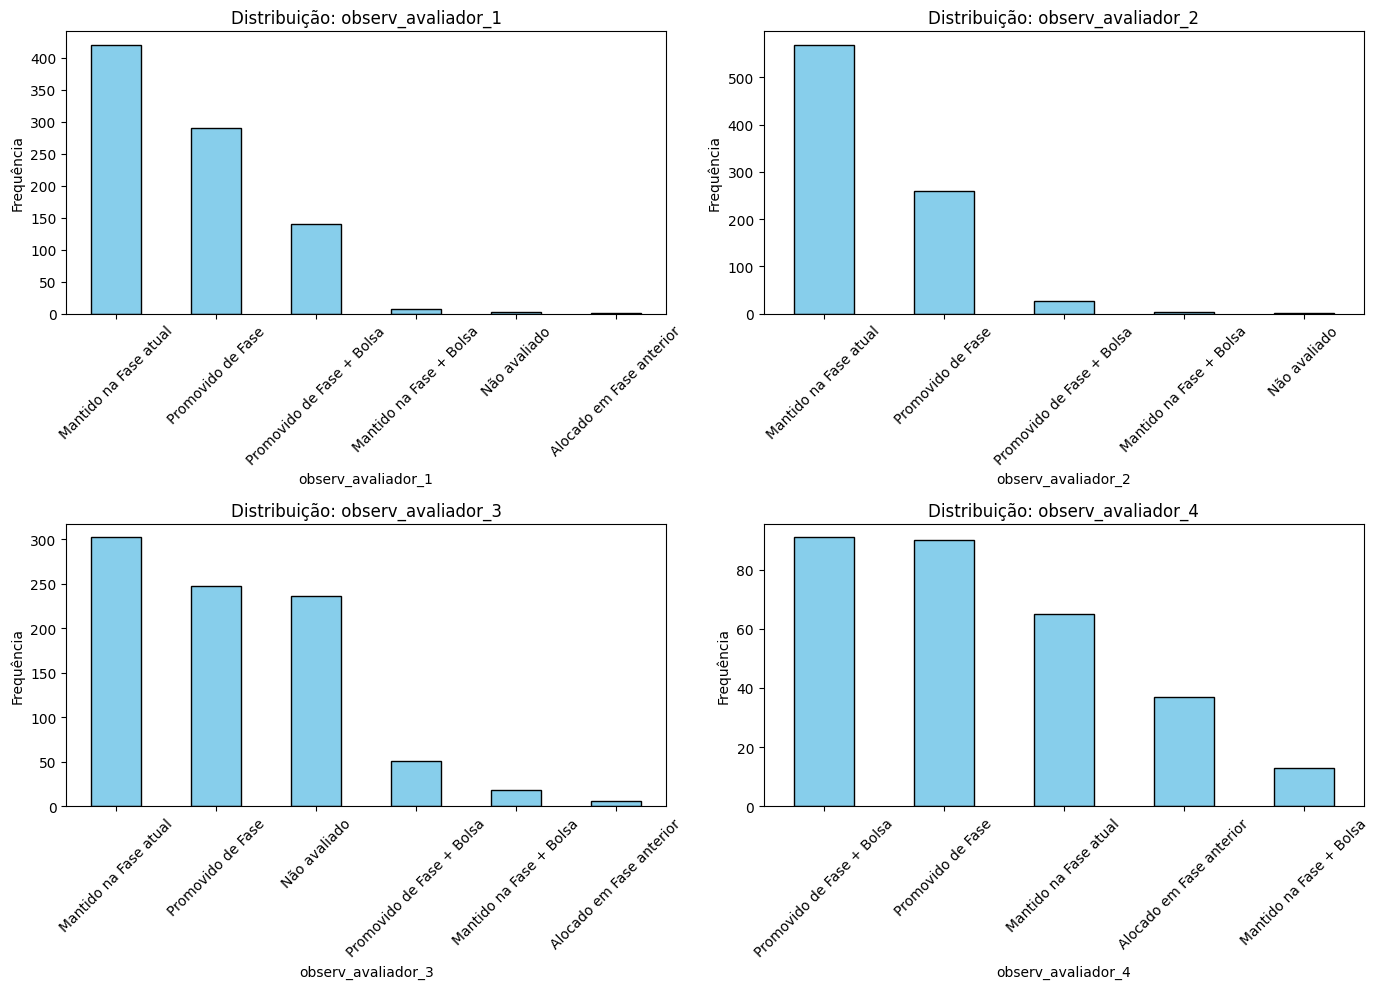

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes_flat = axes.flatten()
colunas_para_plotar = ['observ_avaliador_1', 'observ_avaliador_2', 'observ_avaliador_3', 'observ_avaliador_4']

for i, col in enumerate(colunas_para_plotar):
    # Pandas plot direto no eixo específico
    # value_counts() conta, plot(kind='bar') desenha
    df_2022_cleaned[col].value_counts().plot(kind='bar', ax=axes_flat[i], color='skyblue', edgecolor='black')
    
    axes_flat[i].set_title(f'Distribuição: {col}')
    axes_flat[i].set_ylabel('Frequência')
    
    # Rotaciona os rótulos do eixo X se necessário (útil se os nomes forem longos)
    axes_flat[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


#### Avaliaçao Psicológica

In [27]:
df_2022_cleaned["observ_psico"].unique()

array(['Requer avaliação', 'Sem limitações', 'Não atendido',
       'Não indicado', 'Não avaliado'], dtype=object)

Distribuição de Frequência:
observ_psico
Não atendido        406
Sem limitações      254
Requer avaliação    158
Não indicado         37
Não avaliado          5
Name: count, dtype: int64


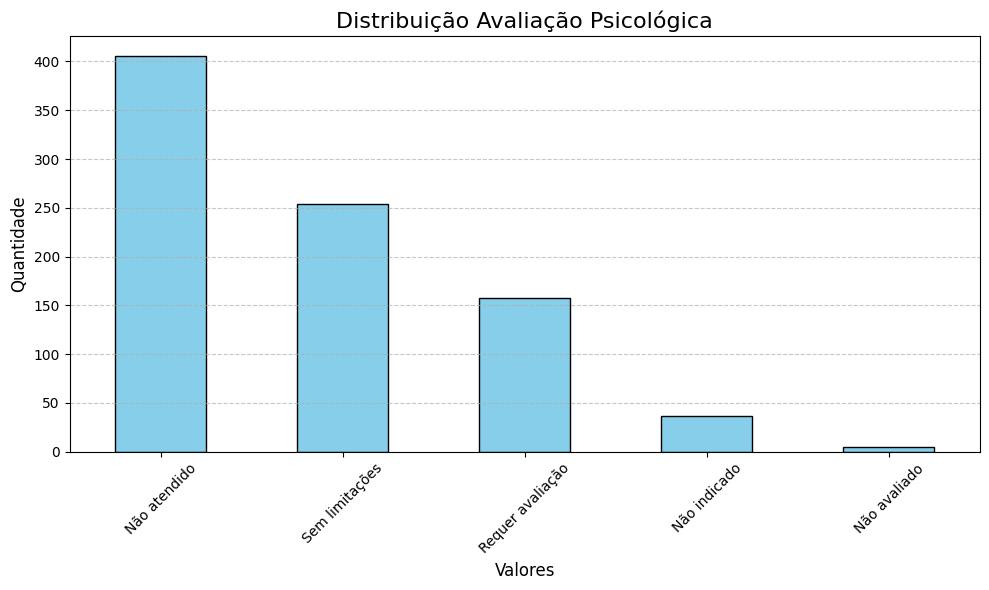

In [28]:
# Etapa 1: Contar a frequência de cada categoria
distribuicao = df_2022_cleaned['observ_psico'].value_counts()

print("Distribuição de Frequência:")
print(distribuicao)

# Etapa 2: Plotar a distribuição
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
distribuicao.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando títulos e rótulos para clareza
plt.title('Distribuição Avaliação Psicológica', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo X para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta o plot para evitar que os rótulos se sobreponham
plt.show()


#### Indicadores de desempenho

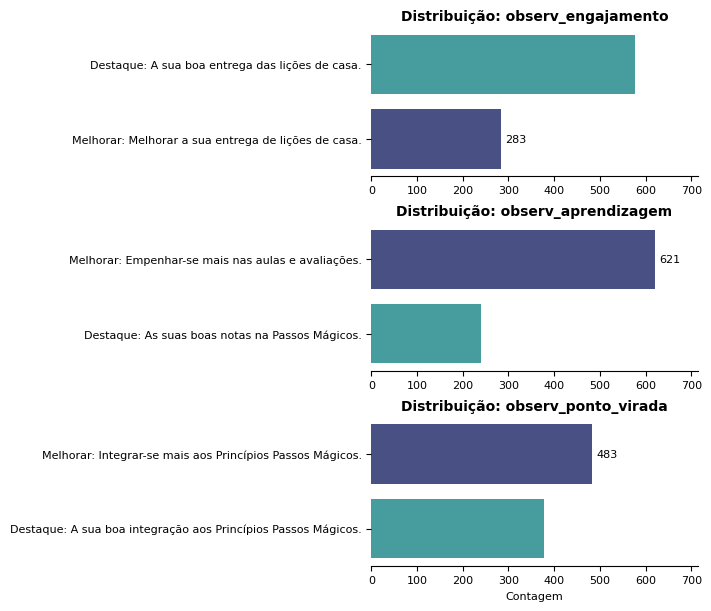

In [29]:
colunas_categoricas = ['observ_engajamento', 'observ_aprendizagem', 'observ_ponto_virada']

max_count = 0
for col in colunas_categoricas:
    current_max = df_2022_cleaned[col].value_counts().max()
    if current_max > max_count:
        max_count = current_max

limite_global_x = max_count * 1.15

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 6), constrained_layout=True)

for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    
    sns.countplot(
        y=col, 
        data=df_2022_cleaned, 
        ax=ax, 
        palette='mako',
        hue=col,
        legend=False, 
        order=df_2022_cleaned[col].value_counts().index
    )
    
    ax.set_title(f'Distribuição: {col}', fontsize=10, fontweight='bold', pad=5)
    ax.set_ylabel('')
    ax.set_xlabel('Contagem' if i == 2 else '', fontsize=8)
    
    ax.set_xlim(0, limite_global_x)
    
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)
    
    sns.despine(left=True, bottom=False, ax=ax)
    
    ax.bar_label(ax.containers[0], fontsize=8, padding=3)

plt.show()


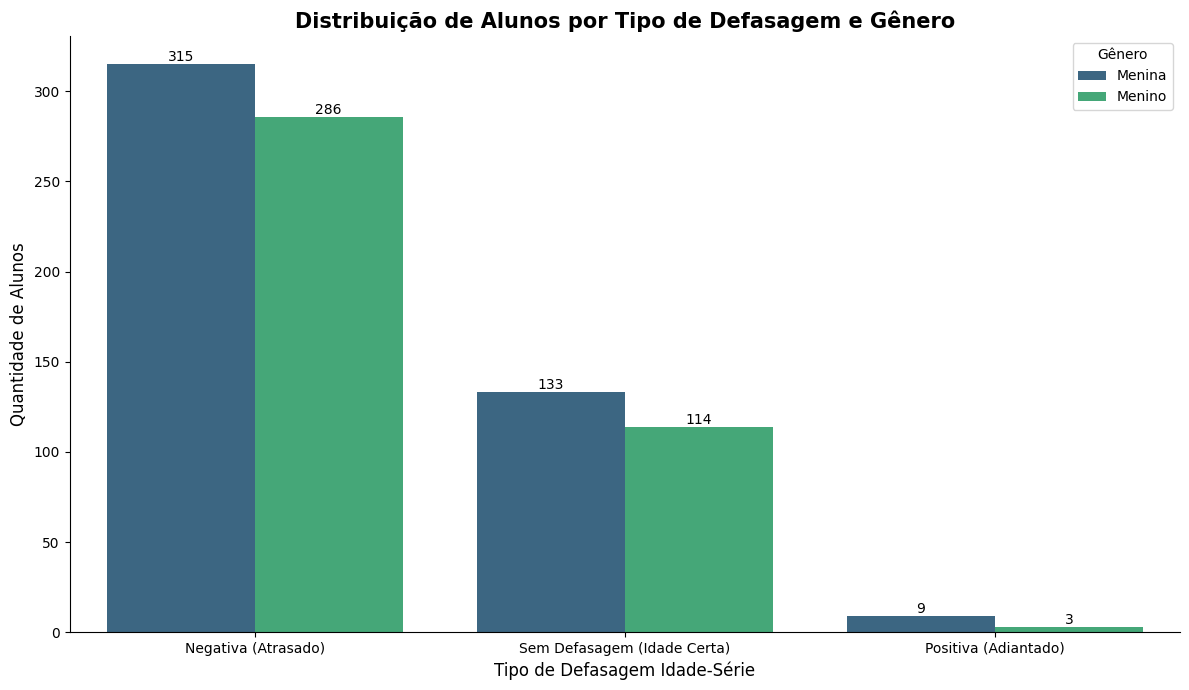

In [30]:
def categorizar_defasagem(valor):
    """Classifica o valor da defasagem em uma categoria de texto."""
    if valor > 0:
        return 'Positiva (Adiantado)'
    elif valor < 0:
        return 'Negativa (Atrasado)'
    else:
        return 'Sem Defasagem (Idade Certa)'

# Aplicamos a função para criar a nova coluna. Usamos .copy() para evitar avisos.
df_plot = df_2022_cleaned.copy()
df_plot['tipo_defasagem'] = df_plot['qtd_defasagem'].apply(categorizar_defasagem)


# --- 2. Criar o Gráfico Agrupado ---
plt.figure(figsize=(12, 7))

# Definimos a ordem desejada para as categorias no eixo X
ordem_grafico = ['Negativa (Atrasado)', 'Sem Defasagem (Idade Certa)', 'Positiva (Adiantado)']

# x='tipo_defasagem': As categorias de defasagem no eixo X.
# hue='genero': Cria barras separadas para cada gênero dentro de cada categoria.
ax = sns.countplot(
    data=df_plot,
    x='tipo_defasagem',
    hue='nome_genero',
    palette='viridis',
    order=ordem_grafico
)

# --- 3. Customizar e Melhorar o Gráfico ---
ax.set_title('Distribuição de Alunos por Tipo de Defasagem e Gênero', fontsize=15, fontweight='bold')
ax.set_xlabel('Tipo de Defasagem Idade-Série', fontsize=12)
ax.set_ylabel('Quantidade de Alunos', fontsize=12)
ax.legend(title='Gênero')

# Adiciona os rótulos de contagem em cima de cada barra
# O loop é necessário pois temos dois grupos de barras (um para cada gênero)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Remove as bordas desnecessárias para um visual mais limpo
sns.despine()

plt.tight_layout()
plt.show()


#### Tabela Equivalência Ano Escolar, Fase e Idade

| Ano Escolar     | Fase Passos Mágicos | Idade ideal   |
|----------------|---------------------|---------------|
| 1º e 2º ano     | Alfa                | 7 - 8 anos    |
| 3º e 4º ano     | Fase 1              | 8 - 9 anos    |
| 5º e 6º ano     | Fase 2              | 10 - 11 anos  |
| 7º e 8º ano     | Fase 3              | 12 - 13 anos  |
| 9º ano          | Fase 4              | 14 anos       |
| 1º EM           | Fase 5              | 15 anos       |
| 2º EM           | Fase 6              | 16 anos       |
| 3º EM           | Fase 7              | 17 anos       |
| Universidade    | Fase 8              | 18 anos >     |

Fonte: Dados PEDE 2020, 2021 e 2022 [link](https://drive.google.com/file/d/1KrQR6Q7PvX_tZEPyKmc3c6HlTmfy1lDe/view?usp=sharing)

#### Validação se campo defasagem possui preenchimento divergente da tabela

In [31]:
def validar_calculo_defasagem(df: pd.DataFrame) -> pd.DataFrame:
    """
    Valida o campo 'qtd_defasagem' recalculando-o com base na idade (num_idade)
    e na fase atual (nome_fase), utilizando a tabela de equivalência fornecida.
    
    Retorna um DataFrame com duas novas colunas:
    - 'defasagem_calculada': O valor recalculado.
    - 'is_calculo_correto': Booleano indicando se o valor original bate com o calculado.
    """
    
    # 1. Mapeamento da Tabela de Equivalência (Fase -> [Idade Min, Idade Max])
    # Baseado na tabela fornecida no prompt.
    # Para 'Fase 8' (18 >), definimos um máximo alto arbitrário (ex: 100).
    mapa_fase_idade = {
        'Alfa':   (7, 8),
        'Fase 1': (8, 9),
        'Fase 2': (10, 11),
        'Fase 3': (12, 13),
        'Fase 4': (14, 14),
        'Fase 5': (15, 15),
        'Fase 6': (16, 16),
        'Fase 7': (17, 17),
        'Fase 8': (18, 100) 
    }

    def calcular_defasagem_teorica(row):
        # Obtém os valores da linha
        fase = row.get('nome_fase')
        idade = row.get('num_idade')
        
        # Validação básica de dados nulos
        if pd.isna(fase) or pd.isna(idade):
            return np.nan
            
        # Garante que a fase seja string e remove espaços extras
        fase_str = str(fase).strip()
        
        # Se a fase não estiver no mapa, não conseguimos validar (retorna NaN)
        if fase_str not in mapa_fase_idade:
            return np.nan
            
        min_ideal, max_ideal = mapa_fase_idade[fase_str]
        
        try:
            idade_num = float(idade)
        except (ValueError, TypeError):
            return np.nan
            
        # Lógica de cálculo da defasagem
        if idade_num < min_ideal:
            # Ex: Tem 6 anos, Mínimo é 7 -> Defasagem -1 (Adiantado)
            return idade_num - min_ideal
        elif idade_num > max_ideal:
            # Ex: Tem 10 anos, Máximo é 8 -> Defasagem +2 (Atrasado)
            return idade_num - max_ideal
        else:
            # Dentro do intervalo ideal
            return 0.0

    # Trabalhamos em uma cópia para não alterar o DataFrame original inadvertidamente
    df_val = df.copy()
    
    # 2. Aplica o cálculo linha a linha
    df_val['defasagem_calculada'] = df_val.apply(calcular_defasagem_teorica, axis=1)
    
    # 3. Verifica se o valor existente bate com o calculado
    def verificar_validade(row):
        calc = row['defasagem_calculada']
        existente = row.get('qtd_defasagem')
        
        # Se ambos são NaN, consideramos válido (ou ignorável)
        if pd.isna(calc) and pd.isna(existente):
            return True
        # Se apenas um é NaN, há inconsistência
        if pd.isna(calc) or pd.isna(existente):
            return False
            
        # Compara os valores (convertendo para float para garantir)
        return float(calc) == float(existente)

    df_val['is_calculo_correto'] = df_val.apply(verificar_validade, axis=1)
    
    return df_val


df_validado = validar_calculo_defasagem(df_2022)

# Filtrando para ver apenas onde o cálculo não bateu
erros = df_validado[df_validado['is_calculo_correto'] == False]

if not erros.empty:
    print(f"Foram encontradas {len(erros)} inconsistências no cálculo de defasagem.")
    # Mostra as colunas relevantes para análise
    cols_visualizacao = ['nome_fase', 'num_idade', 'qtd_defasagem', 'defasagem_calculada']
    display(erros[cols_visualizacao].head())
else:
    print("Todos os valores de 'qtd_defasagem' estão corretos de acordo com a tabela!")


Todos os valores de 'qtd_defasagem' estão corretos de acordo com a tabela!


### Transformações

#### Transformações na base de 2022

- Transformar os novos campos class_pedra_20, class_pedra_21, class_pedra_22 em one-hot-encode, considerando
 os seguintes valores possíveis na ordem crescente: Quartzo, Ágata, Ametista, Topazio 
- Criar indicador de mudança de pedra: se houve diferença entre class_pedra_20, class_pedra_21 marcar -1 ou 1 indicando que a houve queda ou subiu de categoria, o mesmo para o campo class_pedra_22
- Padronizar os valores do campo genero 1 - Menino e 2 - Menina
- Calcular a idade de ingresso no Passos Mágicos
- Fase de ingresso no Passos Mágicos
- Instituição de ensino pública ou particular, tem bolsa ou não
- É possível fazer a média dos avaliadores?
- Criar uma categoria que a ordem importa com o campo observ_avaliador_
- Extrair melhor e pior observação dos 4 avaliadores
- Incluir o "valor não avaliado" para Nan nos campos observ_avaliador_
- Dos campos de observação (observ_engajamento	observ_aprendizagem	observ_ponto_virada) extrair se é Destaque ou Melhorar
- Criar campo que marca os registros que possue um dos valores na avaliação psicologia: Requer avaliação e Não indicado
- Criação dos campos defasagem_negativa (aluno atrasado) e defasagem_positiva (aluno adiantado)

In [32]:
def feature_engineering_passos_magicos(df_input: pd.DataFrame) -> pd.DataFrame:
    """
    Aplica transformações de limpeza e engenharia de atributos no DataFrame
    do Passos Mágicos para preparação de modelos de ML.
    """
    # Trabalhar em uma cópia para não afetar o original
    df = df_input.copy()

    # ==============================================================================
    # 1. PADRONIZAÇÃO BÁSICA
    # ==============================================================================
    
    # Padronizar Gênero (1 -> Menino, 2 -> Menina)
    # Se já estiverem como strings, o map não quebrará se usarmos fillna com o próprio valor
    mapa_genero = {'Menino': 0, 'Menina': 1}
    df['cod_genero'] = df['nome_genero'].map(mapa_genero).fillna(df['nome_genero'])

    # Instituição de Ensino (Categorização Simplificada)
    df['is_escola_publica'] = df['instituicao_ensino'].astype(str).str.lower().str.contains('pública|publica').astype(int)

    # ==============================================================================
    # 2. TRATAMENTO DAS PEDRAS (ORDEM, MUDANÇA E ONE-HOT)
    # ==============================================================================
    
    # Mapeamento Ordinal para cálculos de evolução
    ordem_pedras = {'Quartzo': 1, 'Ágata': 2, 'Ametista': 3, 'Topázio': 4}
    
    # Colunas de interesse
    cols_pedra = ['class_pedra_20', 'class_pedra_21', 'class_pedra_22']
    
    # Criar versões numéricas temporárias para calcular diferenças
    for col in cols_pedra:
        if col in df.columns:
            # map retorna NaN se a pedra não estiver no dicionário
            df[f'{col}_num'] = df[col].map(ordem_pedras)

    # Indicador de Mudança (-1: Caiu, 0: Manteve, 1: Subiu)
    # np.sign retorna -1, 0 ou 1 baseado no sinal da subtração
    if 'class_pedra_20_num' in df.columns and 'class_pedra_21_num' in df.columns:
        df['mudanca_pedra_20_21'] = np.sign(df['class_pedra_21_num'] - df['class_pedra_20_num'])
    
    if 'class_pedra_21_num' in df.columns and 'class_pedra_22_num' in df.columns:
        df['mudanca_pedra_21_22'] = np.sign(df['class_pedra_22_num'] - df['class_pedra_21_num'])

    # Remover as colunas numéricas temporárias (opcional, mas limpa o df)
    cols_temp = [f'{c}_num' for c in cols_pedra if f'{c}_num' in df.columns]
    df.drop(columns=cols_temp, inplace=True)

    # One-Hot Encoding (Transformar os campos categóricos em colunas binárias)
    # dummy_na=False ignora NaNs (ou True se quiser uma coluna para NaN)
    df = pd.get_dummies(df, columns=cols_pedra, prefix=cols_pedra, dtype=int)

    # ==============================================================================
    # 3. CÁLCULOS DE INGRESSO (IDADE E FASE)
    # ==============================================================================
    
    ano_atual_ref = 2022
    if 'ano_ingresso' in df.columns and 'num_idade' in df.columns:
        # Idade que tinha quando entrou
        df['idade_ingresso'] = df['num_idade'] - (ano_atual_ref - df['ano_ingresso'])
        
        # Estimativa da Fase de Ingresso baseada na Idade de Ingresso
        def estimar_fase_ingresso(idade):
            if idade < 7: return 'Pre-Alfa'
            if 7 <= idade <= 8: return 'Alfa'
            if 8 < idade <= 9: return 'Fase 1'
            if 10 <= idade <= 11: return 'Fase 2'
            if 12 <= idade <= 13: return 'Fase 3'
            if idade == 14: return 'Fase 4'
            if idade == 15: return 'Fase 5'
            if idade == 16: return 'Fase 6'
            if idade == 17: return 'Fase 7'
            if idade >= 18: return 'Fase 8'
            return 'Desconhecida'
            
        df['fase_ingresso_estimada'] = df['idade_ingresso'].apply(estimar_fase_ingresso)

    # ==============================================================================
    # 4. AVALIADORES E OBSERVAÇÕES
    # ==============================================================================
    
    # Identificar colunas de avaliadores (assumindo padrão observ_avaliador_X)
    cols_avaliadores = [c for c in df.columns if 'observ_avaliador_' in c]
    
    if cols_avaliadores:
        # Preencher NaN com "Não avaliado"
        df[cols_avaliadores] = df[cols_avaliadores].fillna('Não avaliado')
        
        # Mapeamento Ordinal (IMPORTANTE: Ajuste estes valores conforme seus dados reais)
        # Exemplo hipotético de escala
        mapa_avaliacao = {            
            'Alocado em Fase anterior': 0,
            'Não avaliado': 1, # Considerando nesta ordem por ser uma classificação neutra
            'Mantido na Fase atual': 2,
            'Mantido na Fase + Bolsa': 3,
            'Promovido de Fase': 4,
            'Promovido de Fase + Bolsa': 5
        }
    
        # Criar dataframe temporário numérico para cálculos
        df_aval_num = df[cols_avaliadores].replace(mapa_avaliacao)
        
        # Converter para numérico forçando erros a NaN (caso haja texto não mapeado)
        df_aval_num = df_aval_num.apply(pd.to_numeric, errors='coerce')
        
        # Média dos avaliadores (ignorando zeros/NaN se desejar, aqui considerando tudo)
        # Se 0 for "Não avaliado", talvez queira substituir 0 por NaN antes da média
        df['media_avaliadores'] = df_aval_num.replace(0, np.nan).mean(axis=1).fillna(0)
        
        # Melhor e Pior nota (numérica)
        df['melhor_avaliacao_score'] = df_aval_num.max(axis=1)
        df['pior_avaliacao_score'] = df_aval_num.min(axis=1)

    # Extração de "Destaque" ou "Melhorar" dos campos de texto
    cols_texto_obs = ['observ_engajamento', 'observ_aprendizagem', 'observ_ponto_virada']
    for col in cols_texto_obs:
        if col in df.columns:
            # Cria flag binária (0 ou 1)
            df[f'{col}_tem_destaque'] = df[col].astype(str).str.contains('Destaque', case=False, na=False).astype(int)
            df[f'{col}_tem_melhorar'] = df[col].astype(str).str.contains('Melhorar', case=False, na=False).astype(int)

    # ==============================================================================
    # 5. PSICOLOGIA E DEFASAGEM
    # ==============================================================================
    
    # Flag de Atenção Psicológica
    if 'avaliacao_psicologia' in df.columns:
        valores_atencao = ['Requer avaliação', 'Não indicado']
        df['flag_psico_atencao'] = df['avaliacao_psicologia'].isin(valores_atencao).astype(int)

    # Defasagem Positiva e Negativa
    col_defasagem = 'qtd_defasagem'
    
    if col_defasagem in df.columns:
        # Se > 0, mantém o valor, senão 0
        df['defasagem_positiva'] = df[col_defasagem].apply(lambda x: 1 if x > 0 else 0)
        # Se < 0, mantém o valor, senão 0 (mantém negativo para indicar direção)
        df['defasagem_negativa'] = df[col_defasagem].apply(lambda x: 1 if x < 0 else 0)

    return df

# --- Como usar ---
df_2022_final = feature_engineering_passos_magicos(df_2022_cleaned)

with pd.option_context('display.max_columns', None):
    display(df_2022_final.head(3))

C:\Users\ordepzero\AppData\Local\Temp\ipykernel_26484\1773839151.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aval_num = df[cols_avaliadores].replace(mapa_avaliacao)


,registro_unico,nome_fase,nome_turma,nome_anonimizado,num_ano_nascimento,num_idade,nome_genero,num_ano_ingresso,instituicao_ensino,indic_desenv_educ_22,class_geral,class_fase,class_turma,num_avaliacao,nome_avaliador_1,observ_avaliador_1,nome_avaliador_2,observ_avaliador_2,nome_avaliador_3,observ_avaliador_3,nome_avaliador_4,observ_avaliador_4,indic_auto_avaliacao,indic_engajamento,indic_psicossocial,observ_psico,indic_aprendizagem,nota_media_matematica,nota_media_portugues,nota_media_ingles,flag_indicado_bolsa,flag_atingiu_ponto_virada,nota_media_ponto_virada,nota_media_adequacao,fase_nome_ideal,qtd_defasagem,observ_engajamento,observ_aprendizagem,observ_ponto_virada,cod_genero,is_escola_publica,mudanca_pedra_20_21,mudanca_pedra_21_22,class_pedra_20_Ametista,class_pedra_20_Quartzo,class_pedra_20_Topázio,class_pedra_20_Ágata,class_pedra_21_Ametista,class_pedra_21_Quartzo,class_pedra_21_Topázio,class_pedra_21_Ágata,class_pedra_22_Ametista,class_pedra_22_Quartzo,class_pedra_22_Topázio,class_pedra_22_Ágata,media_avaliadores,melhor_avaliacao_score,pior_avaliacao_score,observ_engajamento_tem_destaque,observ_engajamento_tem_melhorar,observ_aprendizagem_tem_destaque,observ_aprendizagem_tem_melhorar,observ_ponto_virada_tem_destaque,observ_ponto_virada_tem_melhorar,defasagem_positiva,defasagem_negativa
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,1,1,0.0,-1.0,1,0,0,0,1,0,0,0,0,1,0,0,3.25,5,2,0,1,0,1,0,1,0,1
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,1,0,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0,4.50,5,4,0,1,0,1,0,1,0,0
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,6.591,629,13,6,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,1,0,0.0,-1.0,1,0,0,0,1,0,0,0,0,0,0,1,4.75,5,4,1,0,0,1,1,0,0,0
